In [ ]:
!pip install nltk

In [ ]:
# imports the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.manifold import TSNE

In [ ]:
import re
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.util import ngrams
from collections import Counter
from collections import Counter, defaultdict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML Project Dataset/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Content,Title,Type
0,0,new york reuters us environmental group sierra...,politicsNews,true
1,1,washington reuters us air force asked industry...,politicsNews,true
2,2,saturday paul ryan posted photo instagram phot...,News,fake
3,3,america keeps waiting word hillary indicted ob...,politics,fake
4,4,religion peace ht weasel zippers,left-news,fake


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,Unnamed: 0,Content,Title,Type
44893,44893,new york reuters myanmar national security adv...,worldnews,true
44894,44894,reckless hillary cared less seriousness exposi...,politics,fake
44895,44895,montevideo reuters lucia topolansky uruguay se...,worldnews,true
44896,44896,donald trump getting heavy media coverage late...,News,fake
44897,44897,jakarta reuters indonesian security forces eas...,worldnews,true


In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Content', 'Title', 'Type'], dtype='object')

In [ ]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   Content     44266 non-null  object
 2   Title       44898 non-null  object
 3   Type        44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


**Clean the text data**

In [ ]:
# Check if the Content column is not of string data type
if df['Content'].dtype != 'object':
    # Convert Content column to string
    df['Content'] = df['Content'].astype(str)
    print("Converted 'Content' column to string data type.")
else:
    print("The 'Content' column is already of string data type.")

The 'Content' column is already of string data type.


In [ ]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Unnamed: 0      0
Content       632
Title           0
Type            0
dtype: int64

In [ ]:
# Remove rows with missing values
df= df.dropna()

# Fill missing values in 'Content' column with an empty string
df['Content'].fillna('', inplace=True)

# Fill missing values in 'Type' column with the mode
mode_value = df['Type'].mode()[0]
df['Type'].fillna(mode_value, inplace=True)

<ipython-input-7-529fe9219cbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'].fillna('', inplace=True)
<ipython-input-7-529fe9219cbb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'].fillna(mode_value, inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Content       0
Title         0
Type          0
dtype: int64

In [ ]:
df['Title'].value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6432
left-news           4309
Government News     1498
US_News              783
Middle-east          778
Name: Title, dtype: int64

<ipython-input-16-109665f88df8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=df, palette=custom_palette)


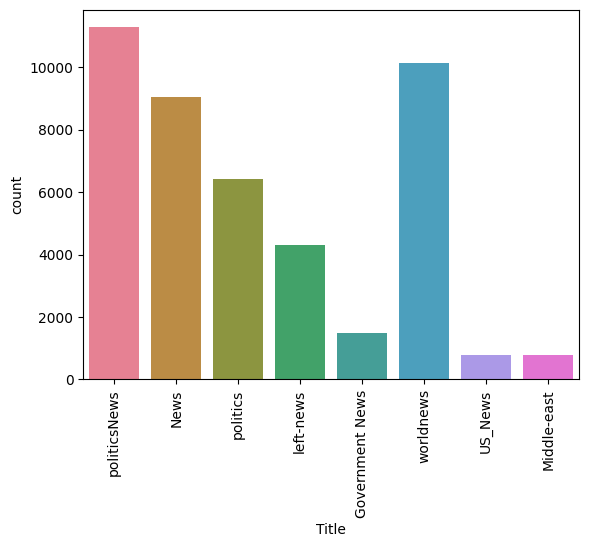

In [ ]:
# Set a custom palette with distinct colors for each title category
custom_palette = sns.color_palette("husl", len(df['Title'].unique()))

# Create a countplot with Seaborn and specify the custom palette
sns.countplot(x='Title', data=df, palette=custom_palette)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

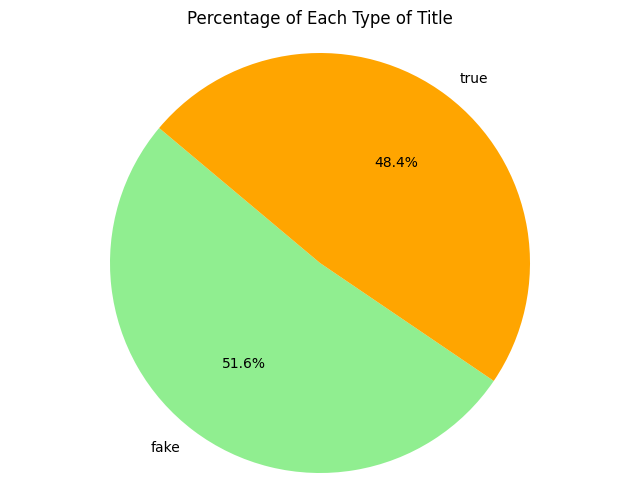

In [ ]:
# Calculate the percentage of each type of title
title_percentage = df['Type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each type of title
colors = ['lightgreen', 'orange']
plt.pie(title_percentage, labels=title_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Type of Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['Type'].unique()


Unique values in the 'type' column:


array(['true', 'fake'], dtype=object)

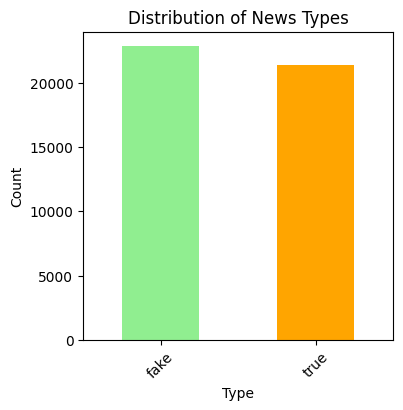

In [ ]:
# Explore unique values in the 'Type' column
type_counts = df['Type'].value_counts()

# Define colors for different types
colors = ['lightgreen', 'orange']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing:**


**processing the text data**


In [ ]:
def process_Content(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to tokenize the text
    def tokenize_text(text):
        return word_tokenize(text)

    # Function to remove stopwords from tokens
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize tokens
    def lemmatize_tokens(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    processed_Content = join_tokens(tokens)

    return processed_Content

# Apply the preprocess_Content function to the 'Content' column
df['Processed_Content'] = df['Content'].apply(process_Content)

# Display the DataFrame after text preprocessing
df.head()

,Unnamed: 0,Content,Title,Type,Processed_Content
0,0,new york reuters us environmental group sierra...,politicsNews,true,new york reuters u environmental group sierra ...
1,1,washington reuters us air force asked industry...,politicsNews,true,washington reuters u air force asked industry ...
2,2,saturday paul ryan posted photo instagram phot...,News,fake,saturday paul ryan posted photo instagram phot...
3,3,america keeps waiting word hillary indicted ob...,politics,fake,america keep waiting word hillary indicted oba...
4,4,religion peace ht weasel zippers,left-news,fake,religion peace ht weasel zipper


**Basic Statistics**




In [ ]:
# Calculate basic statistics
num_documents = len(df)
avg_length = df['Processed_Content'].apply(len).mean()
max_length = df['Processed_Content'].apply(len).max()
min_length = df['Processed_Content'].apply(len).min()

# Print basic statistics
print("Basic Statistics:")
print("Number of documents:", num_documents)
print("Average length of documents:", avg_length)
print("Maximum length of documents:", max_length)
print("Minimum length of documents:", min_length)

Basic Statistics:
Number of documents: 44266
Average length of documents: 1724.3534992996883
Maximum length of documents: 37883
Minimum length of documents: 4


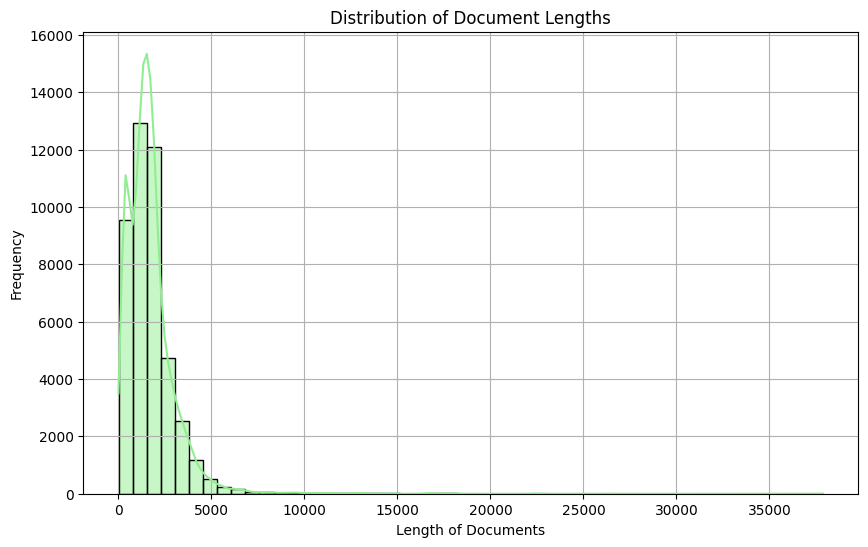

In [ ]:
# Plot distribution of document lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Processed_Content'].apply(len), bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Document Lengths')
plt.xlabel('Length of Documents')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**WordCloud for fake and real news separately**

In [ ]:
# Filter the DataFrame for fake news
fake_df = df[df['Type'] == 'fake']

# Filter the DataFrame for true news
true_df = df[df['Type'] == 'true']

In [ ]:
# Tokenize the text and create 'Tokens' column for fake news
fake_df['Tokens'] = fake_df['Processed_Content'].apply(word_tokenize)

# Tokenize the text and create 'Tokens' column for true news
true_df['Tokens'] = true_df['Processed_Content'].apply(word_tokenize)

<ipython-input-24-0f409229f0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['Tokens'] = fake_df['Processed_Content'].apply(word_tokenize)
<ipython-input-24-0f409229f0a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['Tokens'] = true_df['Processed_Content'].apply(word_tokenize)


In [ ]:
# Create Word Cloud for fake news
fake_tokens = [token for sublist in fake_df['Tokens'] for token in sublist]
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_tokens))

# Create Word Cloud for true news
true_tokens = [token for sublist in true_df['Tokens'] for token in sublist]
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(true_tokens))


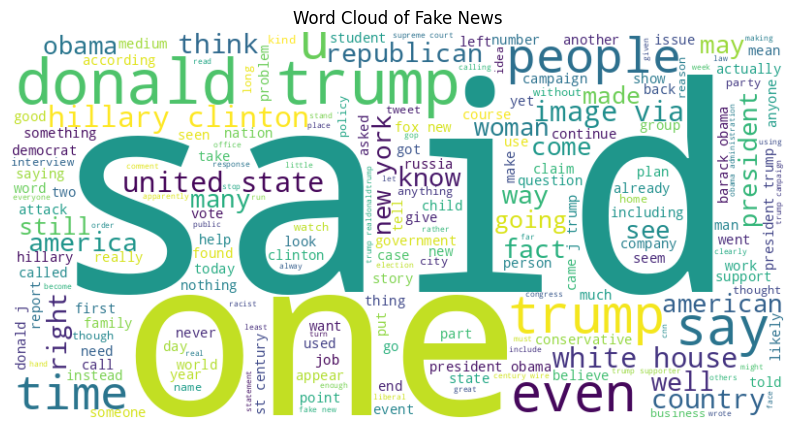

In [ ]:
# Display the Word Cloud for fake news
plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake News')
plt.show()

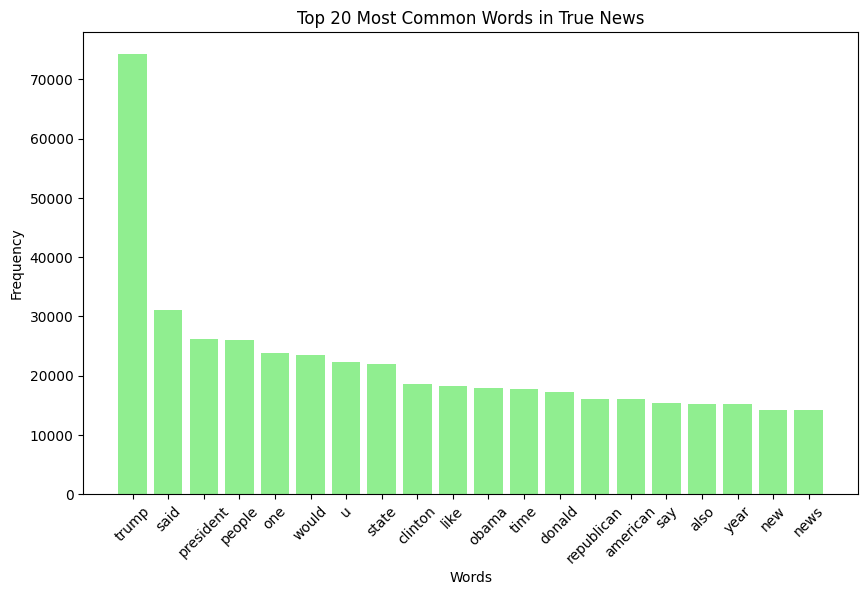

In [ ]:
# Calculate word frequency for fake news
fake_word_freq = Counter([token for sublist in fake_df['Tokens'] for token in sublist])

# Get top 20 most common words for fake news
fake_top_n_words = fake_word_freq.most_common(20)

# Define color for true news as light green
fake_color = 'lightgreen'

# Plot bar chart for true news with light green color
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in fake_top_n_words], [word[1] for word in fake_top_n_words], color=fake_color)
plt.title('Top 20 Most Common Words in True News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


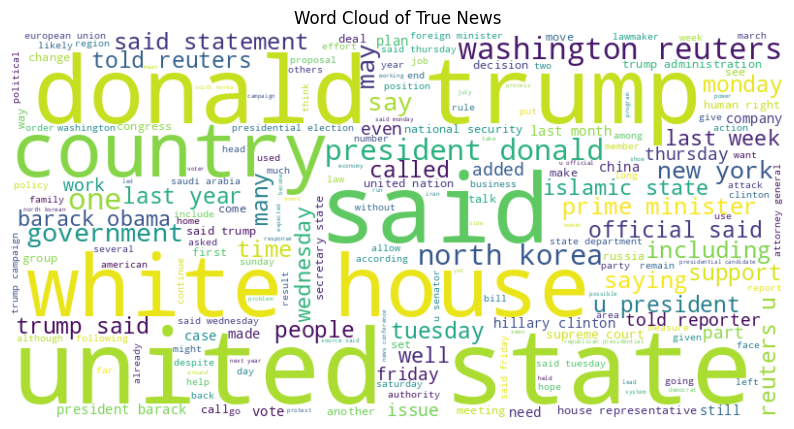

In [ ]:
# Display the Word Cloud for true news
plt.figure(figsize=(10, 6))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of True News')
plt.show()

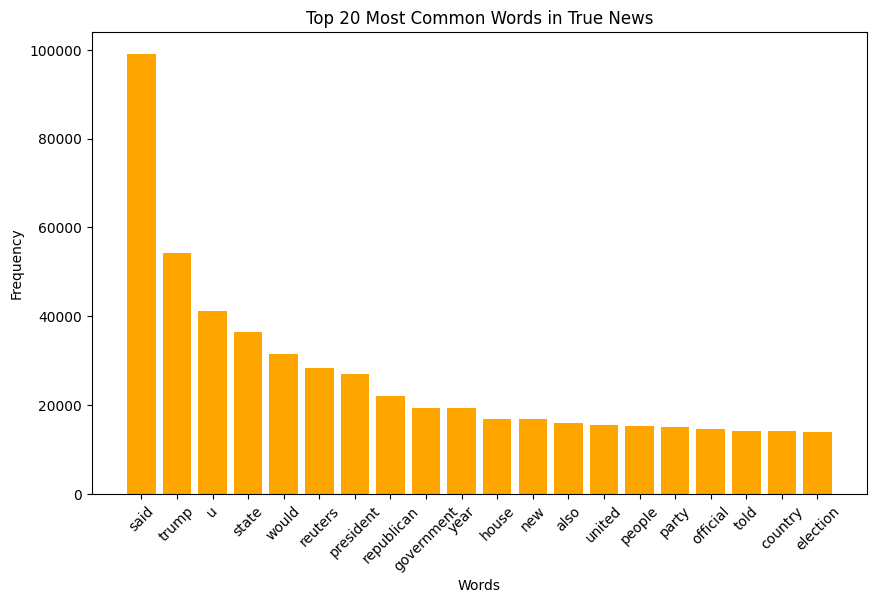

In [ ]:
# Calculate word frequency for true news
true_word_freq = Counter([token for sublist in true_df['Tokens'] for token in sublist])

# Get top 20 most common words for true news
true_top_n_words = true_word_freq.most_common(20)

# Define color for true news as light green
true_color = 'orange'

# Plot bar chart for true news with light green color
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in true_top_n_words], [word[1] for word in true_top_n_words], color=true_color)
plt.title('Top 20 Most Common Words in True News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Text Length Analysis**

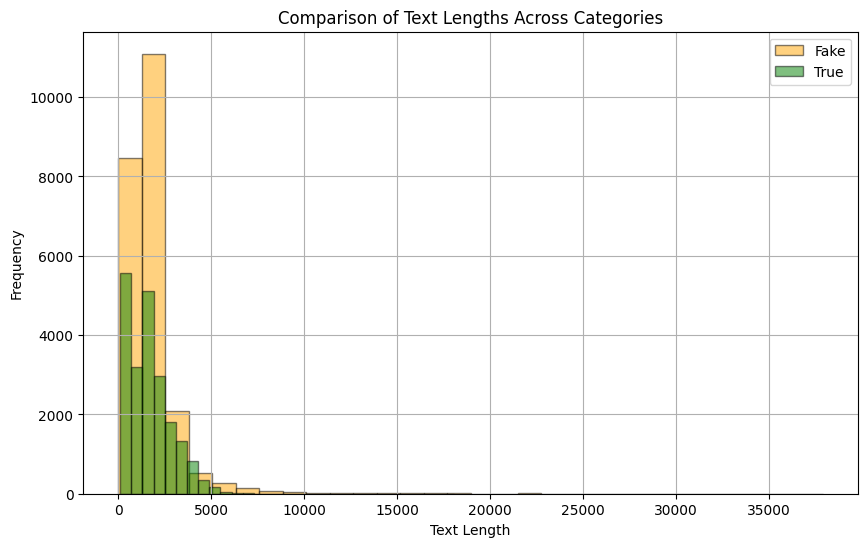

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram for fake news
plt.hist(fake_df['Processed_Content'].apply(len), bins=30, color='orange', alpha=0.5, label='Fake', edgecolor='black')

# Plot histogram for true news
plt.hist(true_df['Processed_Content'].apply(len), bins=30, color='green', alpha=0.5, label='True', edgecolor='black')

plt.title('Comparison of Text Lengths Across Categories')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Vocabulary Analysis**

In [ ]:
def calculate_vocabulary_growth(dataframe):
    vocabulary_sizes = []
    corpus_sizes = []
    vocabulary = set()

    for index, row in dataframe.iterrows():
        tokens = row['Processed_Content'].split()  # Assuming 'Processed_Content' contains preprocessed text data
        vocabulary.update(tokens)
        vocabulary_sizes.append(len(vocabulary))
        corpus_sizes.append(index + 1)

    return vocabulary_sizes, corpus_sizes

# Calculate vocabulary growth for fake news dataframe
fake_vocab_sizes, fake_corpus_sizes = calculate_vocabulary_growth(fake_df)

# Calculate vocabulary growth for true news dataframe
true_vocab_sizes, true_corpus_sizes = calculate_vocabulary_growth(true_df)

In [ ]:
# Total number of vocabulary sizes for fake and true news dataframes
total_fake_vocab_size = sum(fake_vocab_sizes)
total_true_vocab_size = sum(true_vocab_sizes)
print("Total Vocabulary Size for Fake News Dataframe:", total_fake_vocab_size)
print("Total Vocabulary Size for True News Dataframe:", total_true_vocab_size)

Total Vocabulary Size for Fake News Dataframe: 2484516587
Total Vocabulary Size for True News Dataframe: 1059050852


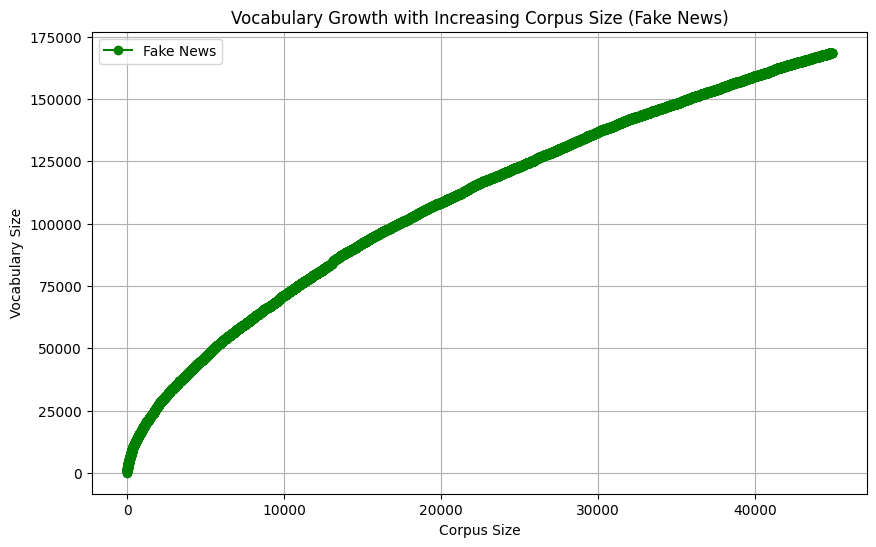

In [ ]:
# Plot the growth of vocabulary with increasing corpus size for fake news
plt.figure(figsize=(10, 6))
plt.plot(fake_corpus_sizes, fake_vocab_sizes, label='Fake News', color='green', marker='o')
plt.title('Vocabulary Growth with Increasing Corpus Size (Fake News)')
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')
plt.grid(True)
plt.legend()
plt.show()

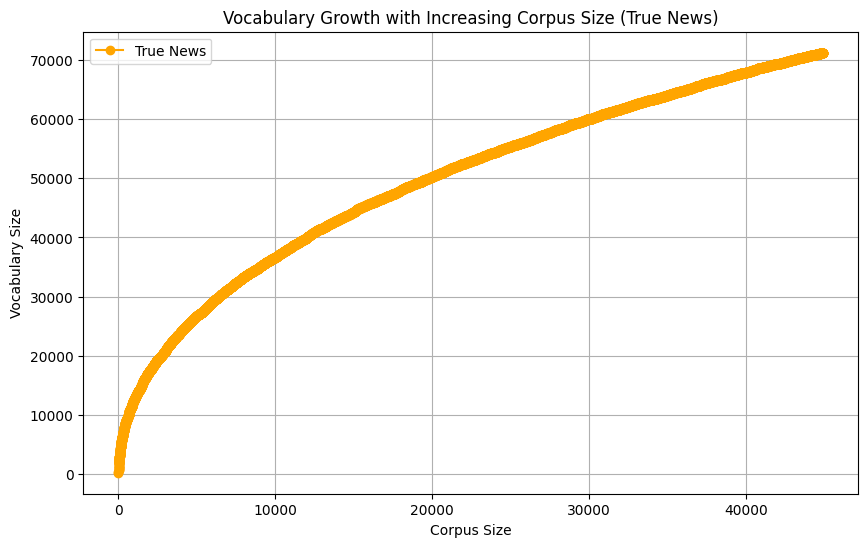

In [ ]:
# Plot the growth of vocabulary with increasing corpus size for true news
plt.figure(figsize=(10, 6))
plt.plot(true_corpus_sizes, true_vocab_sizes, label='True News',  color='orange',marker='o')
plt.title('Vocabulary Growth with Increasing Corpus Size (True News)')
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def calculate_rare_words(dataframe):
    word_freq = {}
    rare_word_count = 0

    # Iterate over each row in the dataframe
    for index, row in dataframe.iterrows():
        # Split the processed content into tokens (assuming 'Processed_Content' contains preprocessed text data)
        tokens = row['Processed_Content'].split()
        # Update word frequencies
        for token in tokens:
            if token in word_freq:
                word_freq[token] += 1
            else:
                word_freq[token] = 1

    # Count the number of rare words (frequency = 1)
    rare_word_count = sum(1 for freq in word_freq.values() if freq == 1)

    return rare_word_count

# Calculate the number of rare words for the fake news dataframe
fake_rare_word_count = calculate_rare_words(fake_df)

# Calculate the number of rare words for the true news dataframe
true_rare_word_count = calculate_rare_words(true_df)

print("Number of Rare Words (Frequency = 1) in Fake News Dataframe:", fake_rare_word_count)
print("Number of Rare Words (Frequency = 1) in True News Dataframe:", true_rare_word_count)

Number of Rare Words (Frequency = 1) in Fake News Dataframe: 75718
Number of Rare Words (Frequency = 1) in True News Dataframe: 26237


In [ ]:
def calculate_common_words(dataframe):
    word_freq = {}
    common_word_count = 0

    # Iterate over each row in the dataframe
    for index, row in dataframe.iterrows():
        # Split the processed content into tokens (assuming 'Processed_Content' contains preprocessed text data)
        tokens = row['Processed_Content'].split()
        # Update word frequencies
        for token in tokens:
            if token in word_freq:
                word_freq[token] += 1
            else:
                word_freq[token] = 1

    # Count the number of common words (frequency > 1)
    common_word_count = sum(1 for freq in word_freq.values() if freq > 1)

    return common_word_count

# Calculate the number of common words for the fake news dataframe
fake_common_word_count = calculate_common_words(fake_df)

# Calculate the number of common words for the true news dataframe
true_common_word_count = calculate_common_words(true_df)

print("Number of Common Words (Frequency > 1) in Fake News Dataframe:", fake_common_word_count)
print("Number of Common Words (Frequency > 1) in True News Dataframe:", true_common_word_count)

Number of Common Words (Frequency > 1) in Fake News Dataframe: 92817
Number of Common Words (Frequency > 1) in True News Dataframe: 45013


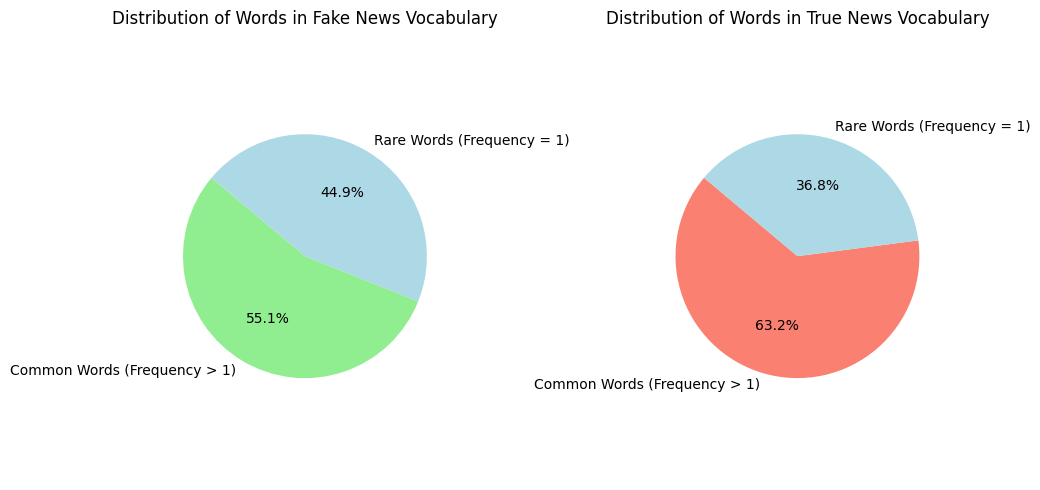

In [ ]:
# Function to compute vocabulary size and number of rare words
def compute_vocabulary_stats(dataframe):
    word_freq = Counter([word for sublist in dataframe['Tokens'] for word in sublist])
    vocabulary_size = len(word_freq)
    num_rare_words = sum(1 for word, freq in word_freq.items() if freq == 1)
    return vocabulary_size, num_rare_words

# Compute vocabulary statistics for fake news dataframe
fake_vocab_size, fake_num_rare_words = compute_vocabulary_stats(fake_df)

# Compute vocabulary statistics for true news dataframe
true_vocab_size, true_num_rare_words = compute_vocabulary_stats(true_df)

# Define labels and sizes for the pie chart
labels = ['Common Words (Frequency > 1)', 'Rare Words (Frequency = 1)']
fake_sizes = [fake_vocab_size - fake_num_rare_words, fake_num_rare_words]
true_sizes = [true_vocab_size - true_num_rare_words, true_num_rare_words]

# Define colors for fake news
fake_colors = ['lightgreen', 'lightblue']

# Define colors for true news
true_colors = ['salmon', 'lightblue']

# Plot pie chart for fake news dataframe
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(fake_sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=fake_colors)
plt.title('Distribution of Words in Fake News Vocabulary')
plt.axis('equal')

# Plot pie chart for true news dataframe
plt.subplot(1, 2, 2)
plt.pie(true_sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=true_colors)
plt.title('Distribution of Words in True News Vocabulary')
plt.axis('equal')

plt.tight_layout()
plt.show()

**Word Context Analysis**

In [ ]:
# Function to create co-occurrence matrix
def create_co_occurrence_matrix(dataframe):
    # Initialize CountVectorizer to create co-occurrence matrix
    vectorizer = CountVectorizer(ngram_range=(1, 1))

    # Fit and transform the processed text data to generate co-occurrence matrix
    co_occurrence_matrix = vectorizer.fit_transform(dataframe['Processed_Content'])

    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Calculate co-occurrence matrix
    co_occurrence_matrix = (co_occurrence_matrix.T * co_occurrence_matrix)  # Symmetric matrix

    return co_occurrence_matrix, feature_names

# Create co-occurrence matrix and get feature names for fake news dataset
fake_co_occurrence_matrix, fake_feature_names = create_co_occurrence_matrix(fake_df)

# Create co-occurrence matrix and get feature names for true news dataset
true_co_occurrence_matrix, true_feature_names = create_co_occurrence_matrix(true_df)

**N-gram Analysis**

In [ ]:
# Function to generate n-grams
def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Function to analyze n-gram frequency
def analyze_ngram_frequency(data, n):
    ngram_freq = Counter()
    for tokens in data:
        ngrams_list = generate_ngrams(tokens, n)
        ngram_freq.update(ngrams_list)
    return ngram_freq

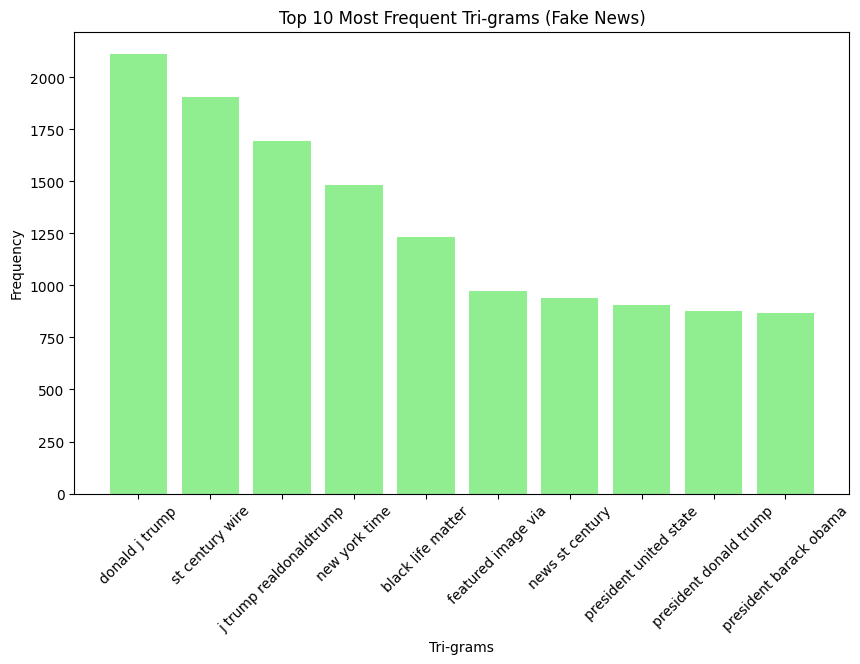

In [ ]:
# Analyze tri-gram frequency for fake news dataset
fake_trigram_freq = analyze_ngram_frequency(fake_df['Tokens'], 3)

# Get top N most common tri-grams for fake news dataset
fake_top_n_trigrams = fake_trigram_freq.most_common(10)

# Plot bar chart for top N most common tri-grams for fake news dataset
plt.figure(figsize=(10, 6))
plt.bar([' '.join(ngram[0]) for ngram in fake_top_n_trigrams], [ngram[1] for ngram in fake_top_n_trigrams],
        color='lightgreen')
plt.title('Top 10 Most Frequent Tri-grams (Fake News)')
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

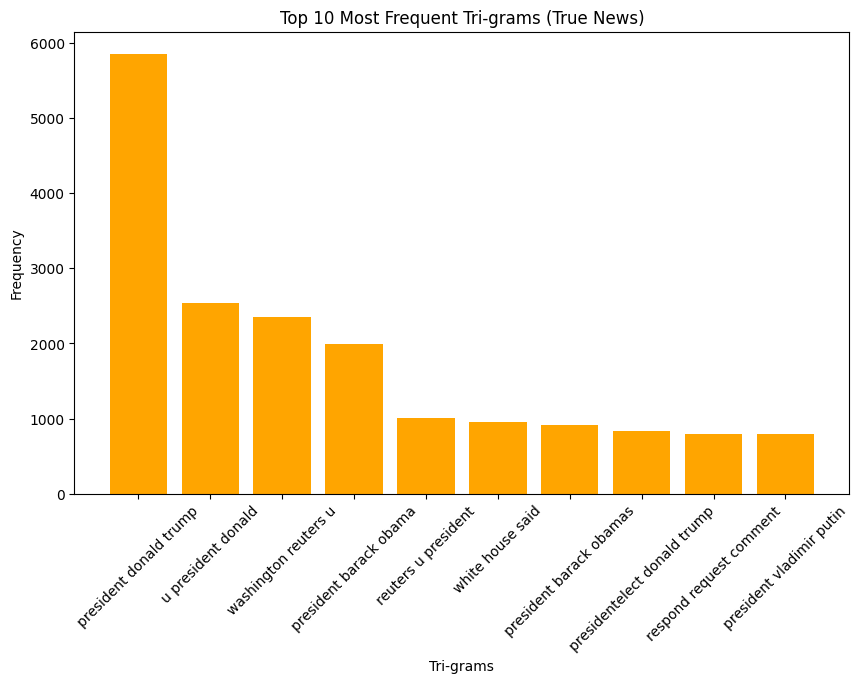

In [ ]:
# Analyze tri-gram frequency for true news dataset
true_trigram_freq = analyze_ngram_frequency(true_df['Tokens'], 3)

# Get top N most common tri-grams for true news dataset
true_top_n_trigrams = true_trigram_freq.most_common(10)

# Plot bar chart for top N most common tri-grams for true news dataset
plt.figure(figsize=(10, 6))
plt.bar([' '.join(ngram[0]) for ngram in true_top_n_trigrams], [ngram[1] for ngram in true_top_n_trigrams],
        color='orange')
plt.title('Top 10 Most Frequent Tri-grams (True News)')
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# **Feature Extraction**

**Bag-of-Words (BoW)**

In [ ]:
def visualize_bow_representation(dataframe):
    # Assuming 'Processed_Content' contains preprocessed text data
    text_data = dataframe['Processed_Content']

    # Initialize CountVectorizer to create BoW representation
    vectorizer = CountVectorizer()

    # Fit and transform the text data to generate BoW matrix
    bow_matrix = vectorizer.fit_transform(text_data)

    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Print the shape of the BoW matrix
    print("Shape of BoW Matrix:", bow_matrix.shape)

    # Print the first few feature names
    print("First few feature names:", feature_names[:10])

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(bow_matrix.toarray(), cmap='viridis', xticklabels=feature_names, yticklabels=False)
    plt.title('Bag-of-Words (BoW) Representation')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()

# Visualize BoW representation for fake_df
visualize_bow_representation(fake_df)

# Visualize BoW representation for true_df
visualize_bow_representation(true_df)

Shape of BoW Matrix: (22850, 168511)
First few feature names: ['aa' 'aaa' 'aaaaackkk' 'aaaahhhh' 'aaaarrgh'
 'aaainnertextreplacernrngquotnquotelsevar' 'aaarf' 'aaccording' 'aadl'
 'aadocumentmodevoid']


In [ ]:
# Assuming 'Processed_Content' contains preprocessed text data
text_data = fake_df['Processed_Content']

# Initialize CountVectorizer to create BoW representation
vectorizer = CountVectorizer()

# Fit and transform the text data to generate BoW matrix
bow_matrix = vectorizer.fit_transform(text_data)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the shape of the BoW matrix
print("Shape of BoW Matrix:", bow_matrix.shape)

# Print the first few feature names
print("First few feature names:", feature_names[:10])

In [ ]:
# Assuming 'Processed_Content' contains preprocessed text data
text_data = true_df['Processed_Content']

# Initialize CountVectorizer to create BoW representation
vectorizer = CountVectorizer()

# Fit and transform the text data to generate BoW matrix
bow_matrix = vectorizer.fit_transform(text_data)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the shape of the BoW matrix
print("Shape of BoW Matrix:", bow_matrix.shape)

# Print the first few feature names
print("First few feature names:", feature_names[:10])

**TF-IDF (Term Frequency-Inverse Document Frequency)**

In [ ]:
def compute_tfidf_representation(dataframe):
    # Assuming 'Processed_Content' contains preprocessed text data
    text_data = dataframe['Processed_Content']

    # Initialize TfidfVectorizer to create TF-IDF representation
    vectorizer = TfidfVectorizer()

    # Fit and transform the text data to generate TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(text_data)

    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names

# Compute TF-IDF representation for fake_df
fake_tfidf_matrix, fake_feature_names = compute_tfidf_representation(fake_df)

# Compute TF-IDF representation for true_df
true_tfidf_matrix, true_feature_names = compute_tfidf_representation(true_df)

# Print the shape of TF-IDF matrices
print("Shape of TF-IDF Matrix (Fake News):", fake_tfidf_matrix.shape)
print("Shape of TF-IDF Matrix (True News):", true_tfidf_matrix.shape)